Submitted by --- ANAND KUMAR TRIPATHI

<h2>Packages and Reading Data</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale,normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

<h2>About Data</h2>

The Titanicpassengers dataset gives the survival status of the passengers on the Titanic, together with
their names, age, sex, passenger class and other data.

Name: Recoded Name of passenger

survival : Survival 0 = No, 1 = Yes

pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex :  Sex Male or Female

Age : Age in years

sibsp : Number of siblings / spouses aboard the Titanic

parch : Number of parents / children aboard the Titanic 

ticket : Ticket number

fare : Passenger fare 

cabin : Cabin number: 

embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
titanic_data_df = pd.read_excel(os.getcwd()+"\Titanic_Passengers_numeric.xlsx")

In [3]:
titanic_data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_data_df.columns=['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest']

In [5]:
titanic_data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df_categorical = titanic_data_df.drop(['name', 'age', 'ticket', 'fare', 'boat', 'body'], axis=1)
df_categorical.head()

,pclass,survived,sex,sibsp,parch,cabin,embarked,home_dest
0,1,1,1,0,0,B5,S,"St Louis, MO"
1,1,1,0,1,2,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,1,1,2,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,0,1,2,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,1,1,2,C22 C26,S,"Montreal, PQ / Chesterville, ON"


<h2>Data Imputation and Cleaning</h2>

In [7]:
titanic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


The training-set has 891 examples and 13 features + the target variable (survived). 3 of the features are floats, 5 are integers and 6 are objects. 

In [8]:
titanic_data_df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,0.355997,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,0.478997,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<h3>Data Missing</h3>

In [9]:
total = titanic_data_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data_df.isnull().sum()/titanic_data_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home_dest,564,43.1
age,263,20.1


<b>Analysis</b>

It will be much more tricky, to deal with the ‘Age’ feature, which has 20% missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop cabin,body,bot and home_dest from the dataset, since >40% of them are missing.

In [10]:
titanic_data_df['sex'].unique()

array([1, 0], dtype=int64)

In [11]:
titanic_data_df['sex'] =titanic_data_df['sex'].apply(lambda df:'female' if df==1 else 'male') 

In [12]:
titanic_data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


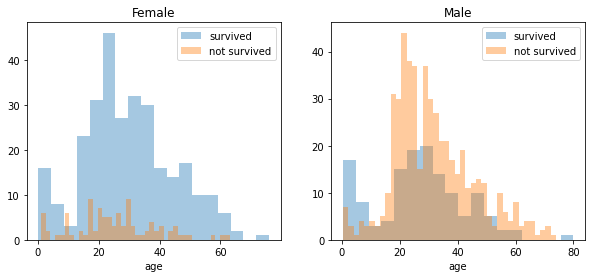

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_data_df[titanic_data_df['sex']=='female']
men = titanic_data_df[titanic_data_df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<b>Analysis</b>

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


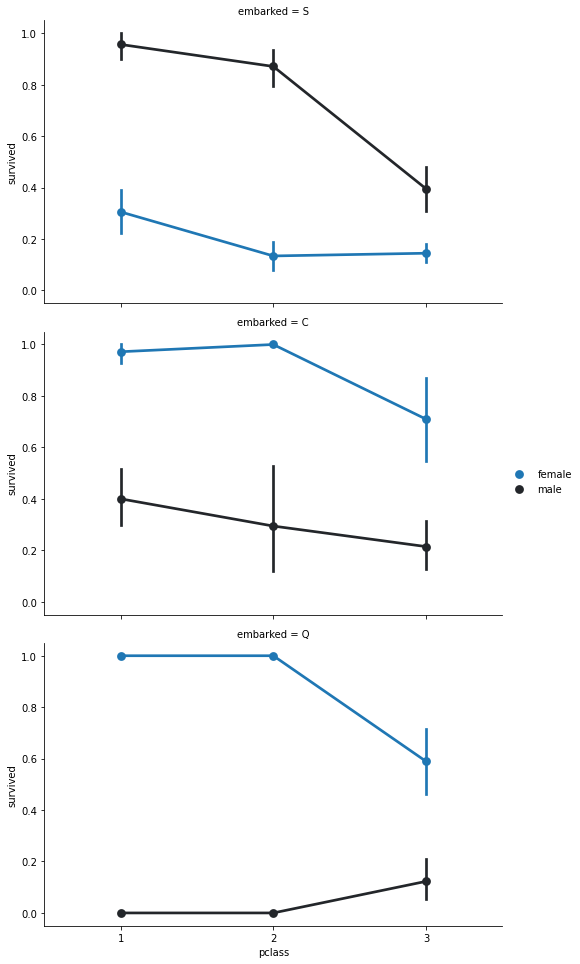

In [14]:
FacetGrid = sns.FacetGrid(titanic_data_df, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<b>Analysis</b>

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 

Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.


<AxesSubplot:xlabel='pclass', ylabel='survived'>

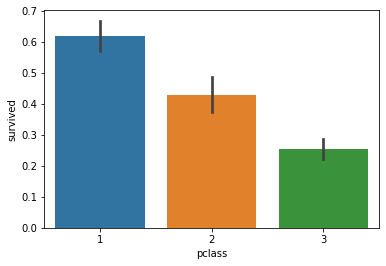

In [15]:
sns.barplot(x='pclass', y='survived', data=titanic_data_df)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


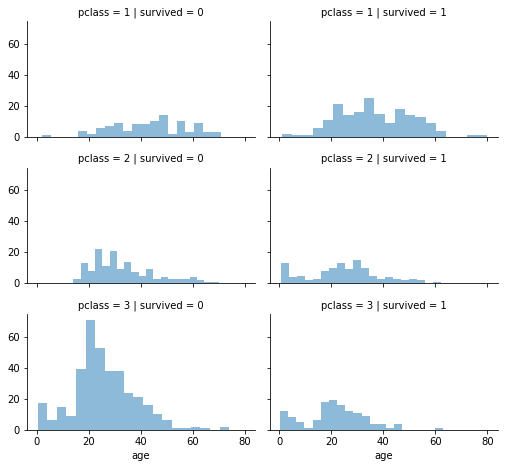

In [16]:
grid = sns.FacetGrid(titanic_data_df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

<b>Analysis</b>

It is observed that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

Text(0.5, 1.0, 'count of sibilings')

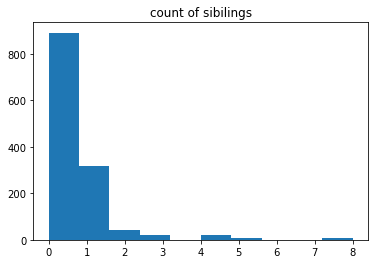

In [17]:
plt.hist(titanic_data_df['sibsp'])
plt.title('count of sibilings')

In [18]:
titanic_data_df['sibsp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

It is clear that many of the people were having either no sibilings or just 1
it does not follow a normal distribution

<AxesSubplot:xlabel='sibsp', ylabel='survived'>

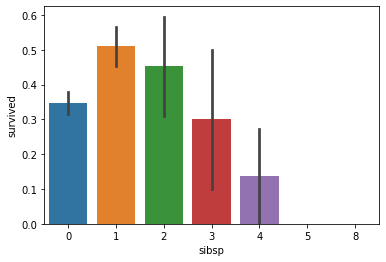

In [19]:
sns.barplot(x='sibsp', y='survived', data=titanic_data_df)

even number of sibilings are more but people who had 2 sibilings had more chances of survival
but we cant say for 3,4,5,6,7,or 8 as there is very less population to make any guess.
it does not follow a normal distribution

Text(0.5, 1.0, 'count of parents/childerns')

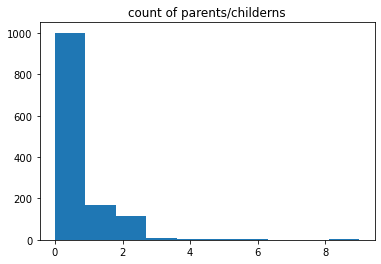

In [20]:
plt.hist(titanic_data_df['parch'])
plt.title('count of parents/childerns')

<AxesSubplot:xlabel='parch', ylabel='survived'>

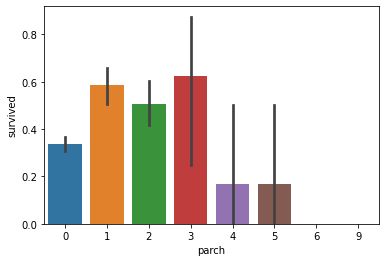

In [21]:
sns.barplot(x='parch', y='survived', data=titanic_data_df)

In [22]:
titanic_data_df['parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: parch, dtype: int64

most of the people are travelling without parents/childens
probability of people who survived were having one or two children
it does not follow a normal distribution

In [23]:
titanic_data_df['fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
13.7917     1
10.7083     1
7.7417      1
7.8208      1
34.6542     1
Name: fare, Length: 281, dtype: int64

<AxesSubplot:>

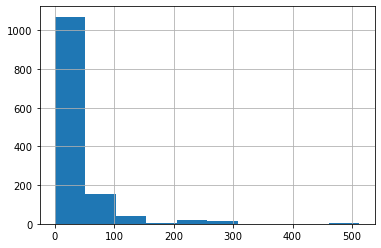

In [24]:
titanic_data_df['fare'].hist()

it does not follow a normal distribution

<AxesSubplot:>

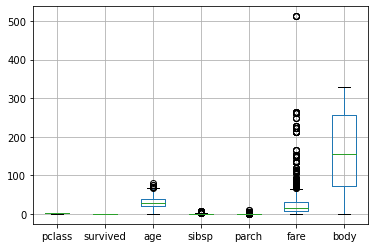

In [25]:
titanic_data_df.boxplot()

# correlation matrix

In [26]:
x = titanic_data_df.select_dtypes(np.number).drop('body', axis=1)

In [27]:
x.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


<AxesSubplot:>

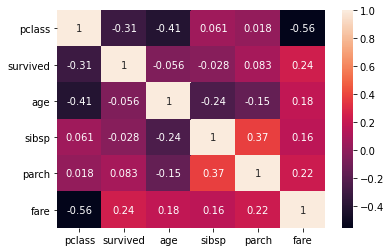

In [28]:
correlation_mat = x.corr()

sns.heatmap(correlation_mat, annot = True)

fare is positively correlated with survival status
pclass is negitively correlated with survival status
elder people are seen to pay higher than younger ones hence travels in better class
people with more children have more sibilings and they pay more

it is clear that rich people travelling in class 1 have high death chances with people in low classes

In [29]:
x.pivot_table(x, index='survived')

,age,fare,parch,pclass,sibsp
survived,,,,,
0,30.545369,23.353831,0.328801,2.500618,0.521632
1,28.918228,49.361184,0.476000,1.962000,0.462000


higher class people has low survival chances

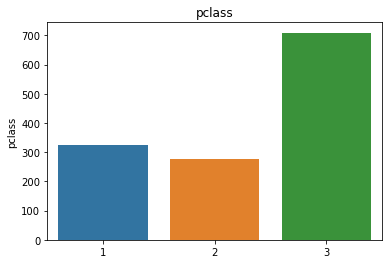

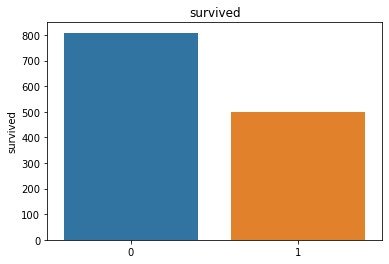

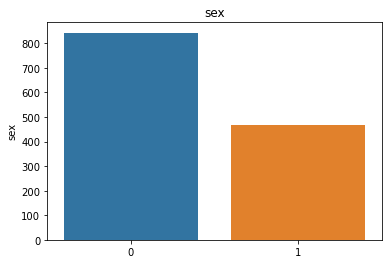

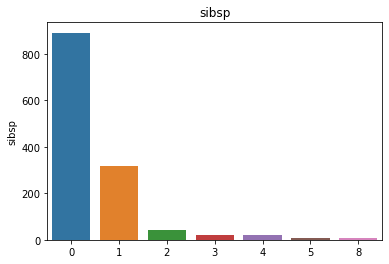

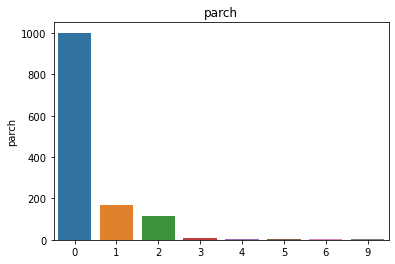

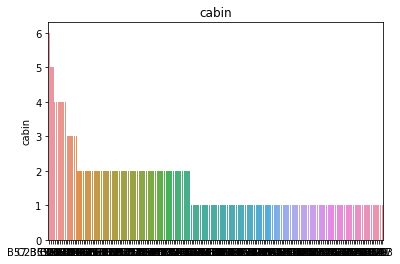

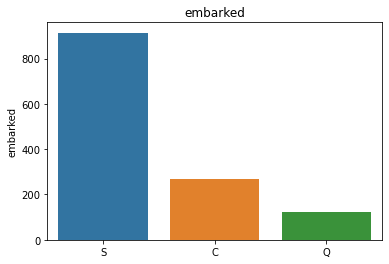

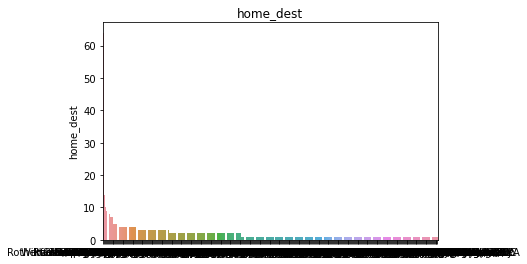

In [30]:
for i in df_categorical:
    sns.barplot(df_categorical[i].value_counts().index, df_categorical[i].value_counts()).set_title(i)
    plt.show()

# Data Cleaning

In [31]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic_data_df['cabin'] = titanic_data_df['cabin'].fillna("U0")
titanic_data_df['deck'] = titanic_data_df['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic_data_df['deck'] = titanic_data_df['deck'].map(deck)
titanic_data_df['deck'] = titanic_data_df['deck'].fillna(0)
titanic_data_df['deck'] = titanic_data_df['deck'].astype(int)
# we can now drop the cabin feature
titanic_data_df = titanic_data_df.drop(['cabin'], axis=1)

In [32]:
mean = titanic_data_df["age"].mean()
titanic_data_df["age"] = titanic_data_df["age"].fillna(mean)

In [33]:
titanic_data_df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [34]:
#S is the top value so we are replacing our embarked with S
titanic_data_df['embarked'] = titanic_data_df['embarked'].fillna('S')
#

In [35]:
titanic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1309 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home_dest  745 non-null    object 
 13  deck       1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 138.2+ KB


In [36]:
titanic_data_df['fare'] = titanic_data_df['fare'].fillna(0)
titanic_data_df['fare'] = titanic_data_df['fare'].astype(int)

In [37]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

    # extract titles
titanic_data_df['title'] = titanic_data_df.name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
titanic_data_df['title']  = titanic_data_df['title'] .replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                         'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data_df['title']  = titanic_data_df['title'] .replace('Mlle', 'Miss')
titanic_data_df['title']  = titanic_data_df['title'] .replace('Ms', 'Miss')
titanic_data_df['title']  = titanic_data_df['title'] .replace('Mme', 'Mrs')
# convert titles into numbers
titanic_data_df['title']  = titanic_data_df['title'] .map(titles)
# filling NaN with 0, to get safe
titanic_data_df['title']  = titanic_data_df['title'] .fillna(0)
titanic_data_df = titanic_data_df.drop(['name'], axis=1)

In [38]:
genders = {"male": 0, "female": 1}
titanic_data_df['sex'] = titanic_data_df['sex'].map(genders)

In [39]:
#Since the Ticket attribute has 681 unique tickets, 
#it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.
ports = {"S": 0, "C": 1, "Q": 2}
titanic_data_df = titanic_data_df.drop(['ticket'], axis=1)
titanic_data_df['embarked'] = titanic_data_df['embarked'].map(ports)

In [40]:
titanic_data_df['age'] = titanic_data_df['age'].astype(int)
titanic_data_df.loc[ titanic_data_df['age'] <= 11, 'Age'] = 0
titanic_data_df.loc[(titanic_data_df['age'] > 11) & (titanic_data_df['age'] <= 18), 'age'] = 1
titanic_data_df.loc[(titanic_data_df['age'] > 18) & (titanic_data_df['age'] <= 22), 'age'] = 2
titanic_data_df.loc[(titanic_data_df['age'] > 22) & (titanic_data_df['age'] <= 27), 'age'] = 3
titanic_data_df.loc[(titanic_data_df['age'] > 27) & (titanic_data_df['age'] <= 33), 'age'] = 4
titanic_data_df.loc[(titanic_data_df['age'] > 33) & (titanic_data_df['age'] <= 40), 'age'] = 5
titanic_data_df.loc[(titanic_data_df['age'] > 40) & (titanic_data_df['age'] <= 66), 'age'] = 6
titanic_data_df.loc[ titanic_data_df['age'] > 66, 'age'] = 6

In [41]:
#For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. 
#But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 
#80% of the values would fall into the first category. 
#Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.
titanic_data_df.loc[ titanic_data_df['fare'] <= 7.91, 'fare'] = 0
titanic_data_df.loc[(titanic_data_df['fare'] > 7.91) & (titanic_data_df['fare'] <= 14.454), 'fare'] = 1
titanic_data_df.loc[(titanic_data_df['fare'] > 14.454) & (titanic_data_df['fare'] <= 31), 'fare']   = 2
titanic_data_df.loc[(titanic_data_df['fare'] > 31) & (titanic_data_df['fare'] <= 99), 'fare']   = 3
titanic_data_df.loc[(titanic_data_df['fare'] > 99) & (titanic_data_df['fare'] <= 250), 'fare']   = 4
titanic_data_df.loc[ titanic_data_df['fare'] > 250, 'fare'] = 5
titanic_data_df['fare'] = titanic_data_df['fare'].astype(int)

In [42]:
titanic_data_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home_dest,deck,title,Age
0,1,1,1,4,0,0,4,0,2,NaN,"St Louis, MO",2,2,NaN
1,1,1,0,0,1,2,4,0,11,NaN,"Montreal, PQ / Chesterville, ON",3,4,0.0
2,1,0,1,2,1,2,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,2,0.0
3,1,0,0,4,1,2,4,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,1,NaN
4,1,0,1,3,1,2,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,3,NaN


In [43]:
#titanic_data_df = titanic_data_df.drop(['boat'], axis=1)
#titanic_data_df = titanic_data_df.drop(['body'], axis=1)
#titanic_data_df = titanic_data_df.drop(['home_dest'], axis=1)
titanic_data_df = titanic_data_df.drop(['age'], axis=1)
#titanic_data_df = titanic_data_df.drop(['age_alass'], axis=1)

<h2>Data Balancing Check</h2>

<AxesSubplot:>

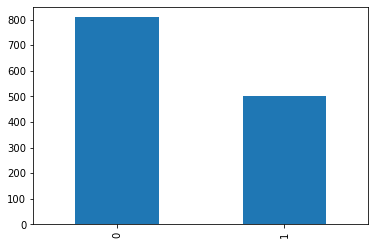

In [44]:
titanic_data_df['survived'].value_counts().plot(kind='bar')

<b>Analysis</b>

The passengers who are not survived are more than survived, its an imbalanced classification

<h2>Data Modelling</h2>

<h3>Data Splitting</h3>

In [45]:
x_train, x_test, y_train, y_test = train_test_split(titanic_data_df.loc[:,~titanic_data_df.columns.isin(['survived'])], titanic_data_df['survived'],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=titanic_data_df['survived'])

<h2>SVM</h2>

In [46]:
#Some useful functions
def plot_confusion_matrix(test_y, predict_y):
        test_y = test_y.astype(int)
        predict_y = predict_y.astype(int)
        C = confusion_matrix(test_y, predict_y)
        C = C.astype(int)
        labels = ['0','1']
        print("-"*20, "Confusion matrix", "-"*20)
        plt.figure(figsize=(15,7))
        sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".0f", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Class')
        plt.ylabel('Original Class')
        plt.show()

#Hyperparameter tuning the model (Non tree models)
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_multi=False):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro',return_train_score=True)
    grid.fit(train_data_x, train_data_y)
    results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                         #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    if not is_multi:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        plt.plot(plot_values,grid.cv_results_['mean_train_score'])
        plt.plot(plot_values,grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy', 'CV Accuracy'])
        plt.show()
    return grid.best_params_

def tuning_random(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_multi=False,extra_params={},model_tags=[]):
        grid = RandomizedSearchCV(model, parameters, cv = 3,n_jobs=-1,scoring = 'f1_macro',refit=True,return_train_score=True)
        if extra_params=={}:
            grid.fit(train_data_x, train_data_y)
        else:
            grid.fit(train_data_x, train_data_y,**extra_params)
        print('Training Completed')  

 

        results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
        params = results['params']                         #storing combination of parameters used by model in params
        score_tr_array = results['mean_train_score']         #storing scores on train data of model
        score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    #     for i in range(len(params)):
    #         print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
        print('Best Parameter is ',  grid.best_params_)
        print('Best F1 Score is ',  grid.best_score_)
        if not is_multi:
            plt.xlabel(parameter_name)
            plt.title('Cross Validation')
            plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
            plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
            plt.legend(['Train Accuracy', 'CV Accuracy'])
            plt.show()
        return grid.best_params_

In [47]:
svm_model = SVC(kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,20,30]
alphas = {'C' : alpha}
best_params = tuning(svm_model, alphas, 'C', x_train, y_train, alpha)

C:\Users\tripa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tripa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tripa\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 160, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\tripa\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\tripa\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\tripa\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\U

ValueError: could not convert string to float: 'C'

In [ ]:
best_alpha = best_params['C']
svm_clf = SVC(decision_function_shape='ovo', kernel='linear',C = best_alpha,probability=True).fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)
y_pred_proba = svm_clf.predict_proba(x_test)

In [ ]:
titanic_data_df['prediction'] = svm_clf.predict(titanic_data_df.loc[:,~titanic_data_df.columns.isin(['survived'])])

In [ ]:
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]
cm = sns.light_palette("green", as_cmap=True)

(titanic_data_df.head(10).style
  .background_gradient(cmap=cm, subset=['survived','prediction'])
  .set_caption('SVM Prediction')
  .set_table_styles(styles))

In [ ]:
mod_acc = accuracy_score(y_test, y_pred)
mod_f1 = f1_score(y_test, y_pred, average = 'macro')
mod_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', mod_acc)
print('F1 Score of model on testing data is', mod_f1)
print('Log loss of model on testing data is', mod_ll)

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
#Calculating True Positive Rate and False Positive Rate
C = confusion_matrix(y_test, y_pred)
C = C.astype(int)
TN, FP, FN,TP = C[0][0], C[0][1], C[1][0], C[1][1]
SVM_TPR = TP/(TP+FN)
SVM_FPR = FP/(FP+TN)

<h2>Model Summary</h2>

In [ ]:
Model_Results = pd.DataFrame([['SVM',mod_acc,mod_f1,mod_ll,SVM_TPR,SVM_FPR]],\
                             columns=['Model','Accuracy','F1_Score','Log_Loss','TPR','FPR'])

In [ ]:
Model_Results.plot(x='Model',y=['Accuracy','F1_Score','Log_Loss','TPR','FPR'], kind='bar',figsize=(8,6))

<h2>Model Summary</h2>

The Accuracy and F1 Score of svm is around 80%

The TPR is high and FPR is less, hence we can summarize that the positive are not majorly misclassified